In [1]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Information

In [4]:
train_df.shape

(45211, 17)

In [5]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
train_df.isnull().mean()*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

#### `No Missing values found in the data`

In [7]:
train_df["day"] = train_df["day"].astype("object")

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(6), object(11)
memory usage: 5.9+ MB


#### `Numerical Features --> 6`
#### `Categorical Features --> 11`

# Spliting Numerical and Categorical Data

In [9]:
numerical_columns = train_df.select_dtypes(exclude='object').columns
numerical_columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [10]:
categorical_columns = train_df.select_dtypes(include='object').columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day', 'month', 'poutcome', 'y'],
      dtype='object')

# Numerical Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Univariate Analysis

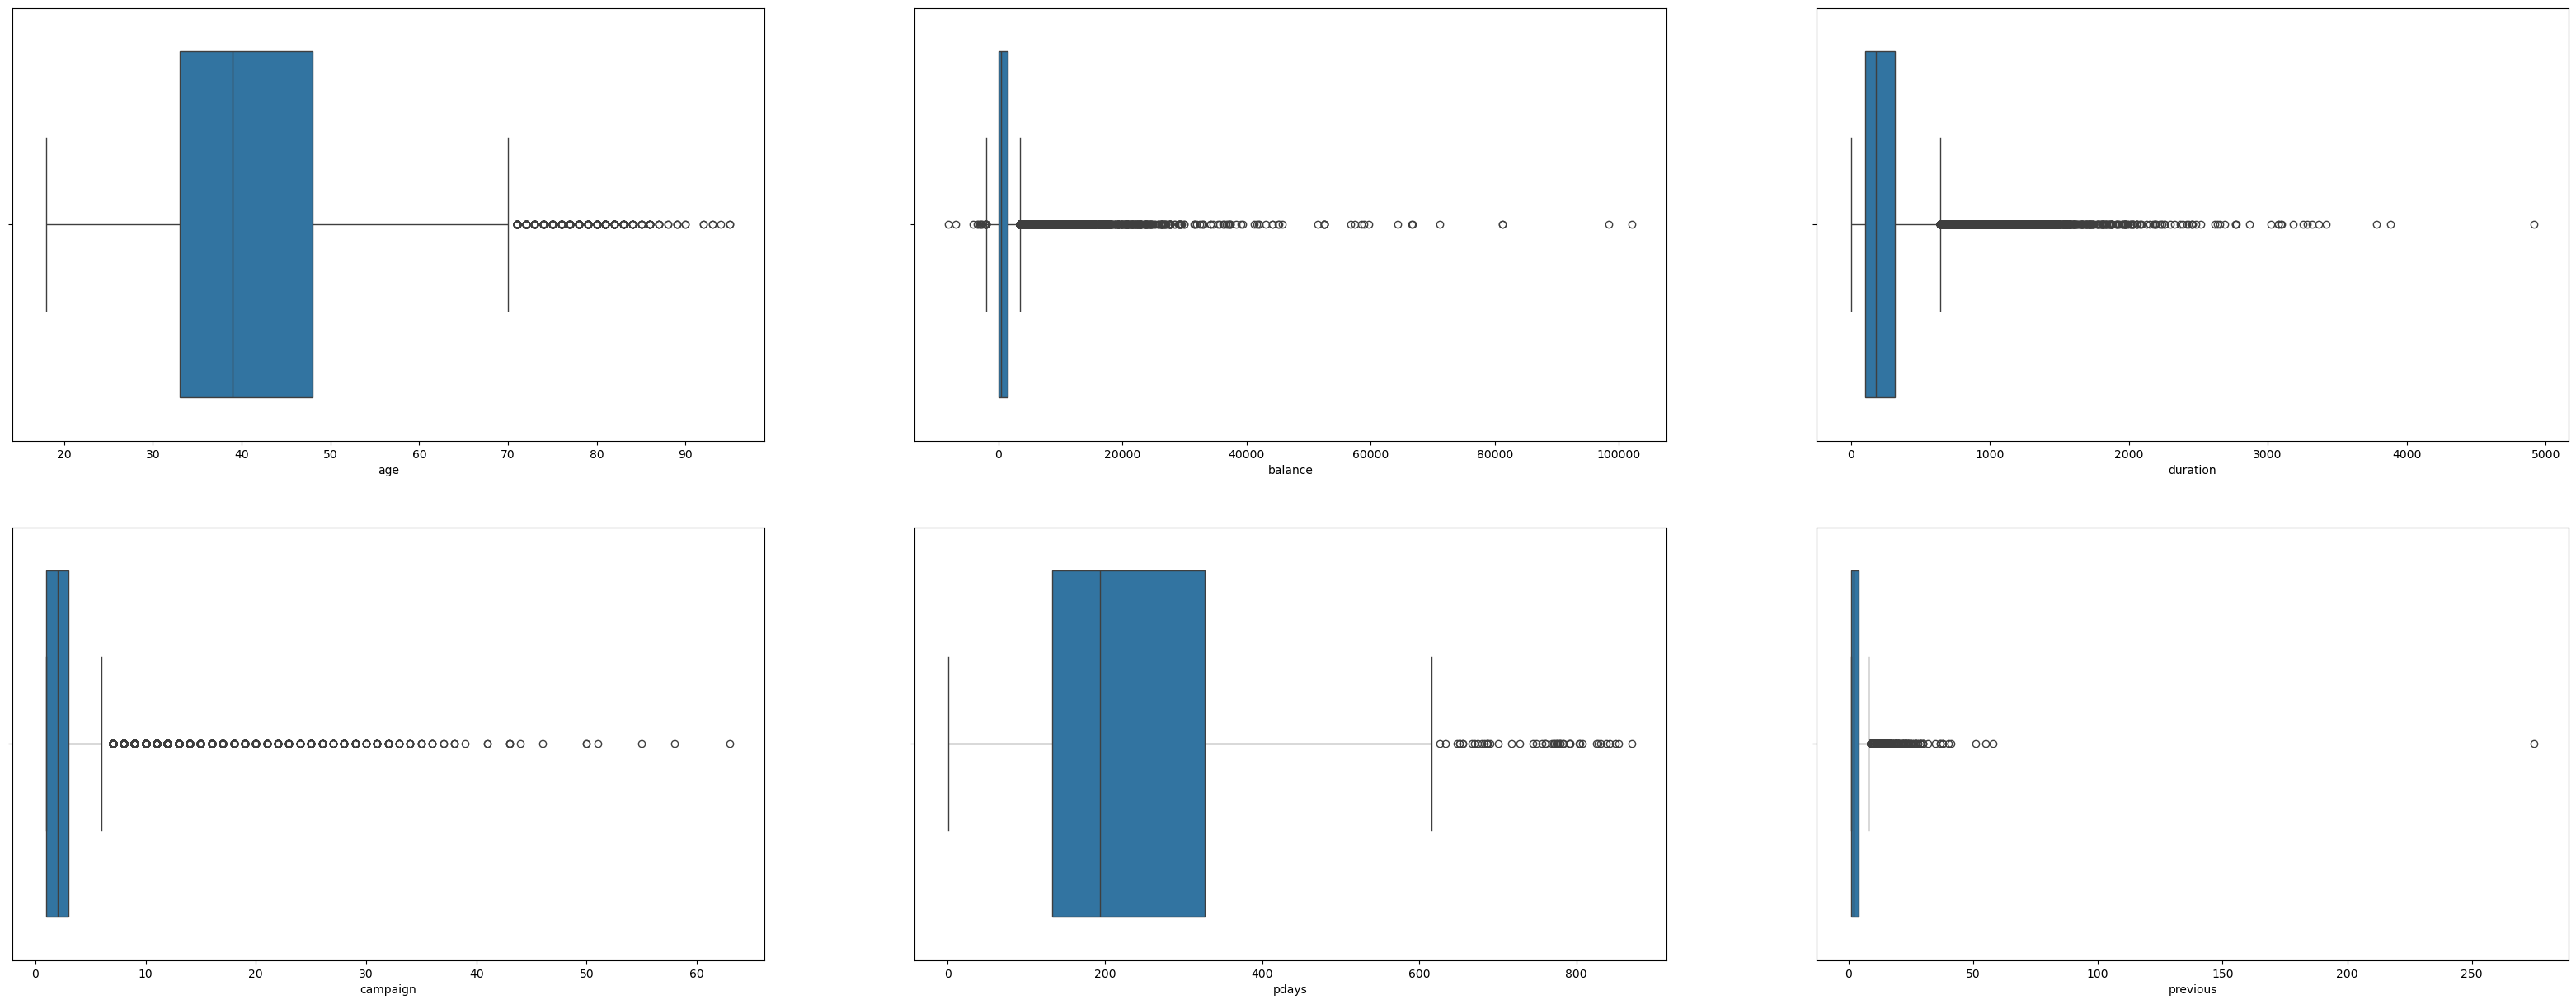

In [12]:
plt.figure(figsize=(40,15))

for idx,col in enumerate(numerical_columns):
    plt.subplot(2,3,idx+1) 

    if col =='pdays':
        data = train_df[train_df[col]>-1]
        sns.boxplot(data = data,x = col)
        continue  

    if col == 'previous':
        data = train_df[train_df[col]>0]
        sns.boxplot(data = data,x = col)
        continue    

    sns.boxplot(data = train_df,x = col)

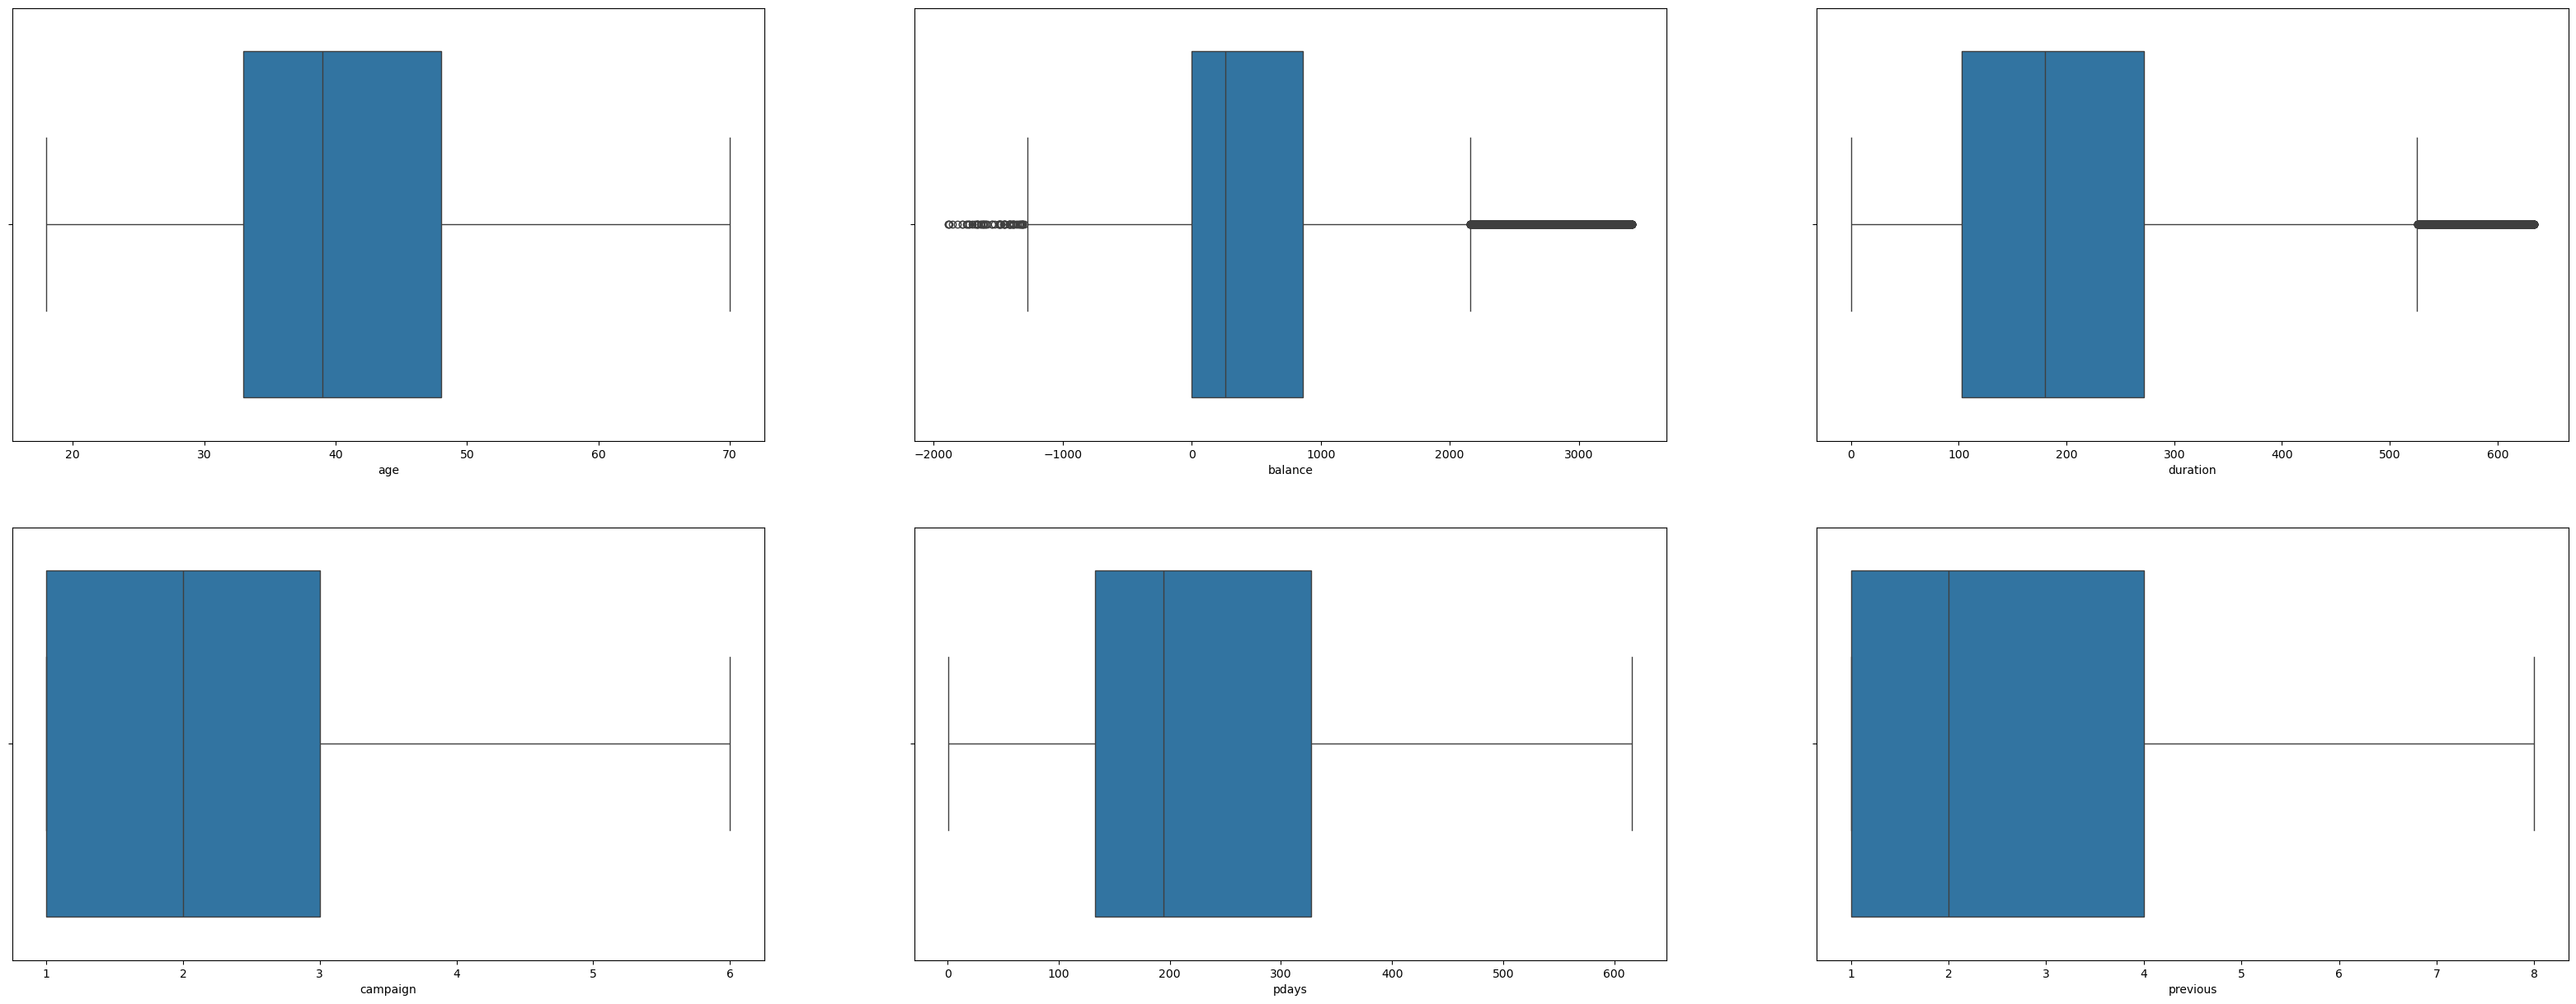

In [13]:
plt.figure(figsize=(40,15))

data = train_df.copy()

for idx,col in enumerate(numerical_columns):

    if col =='pdays':
        data = data[data[col]>-1]
     
    if col == 'previous':
        data = data[data[col]>0]   

    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3-q1

    upper = q3+1.5*iqr
    lower = q1-1.5*iqr

    data = data[(lower<data[col]) & (data[col]<upper)]

    if col!='pdays' or col!='previous':
        train_df[col] = np.where(train_df[col]>upper,data[col].sample(1),
                        np.where(train_df[col]<lower,data[col].sample(1),train_df[col]))

    if col =='pdays':
        train_df[col] = np.where(train_df[col]>upper,data[col].sample(1),
                    np.where((0<train_df[col]) & (train_df[col]<lower),data[col].sample(1),train_df[col]))
        plt.subplot(2,3,idx+1) 
        sns.boxplot(data = train_df[train_df[col]>-1],x = col)  
        continue             
     
    if col == 'previous':
        train_df[col] = np.where(train_df[col]>upper,data[col].sample(1),
                    np.where((0<train_df[col]) & (train_df[col]<lower),data[col].sample(1),train_df[col]))
        
        plt.subplot(2,3,idx+1) 
        sns.boxplot(data = train_df[train_df[col]>0],x = col)
        continue

    plt.subplot(2,3,idx+1) 
    sns.boxplot(data = train_df,x = col)                

<Axes: xlabel='age', ylabel='Count'>

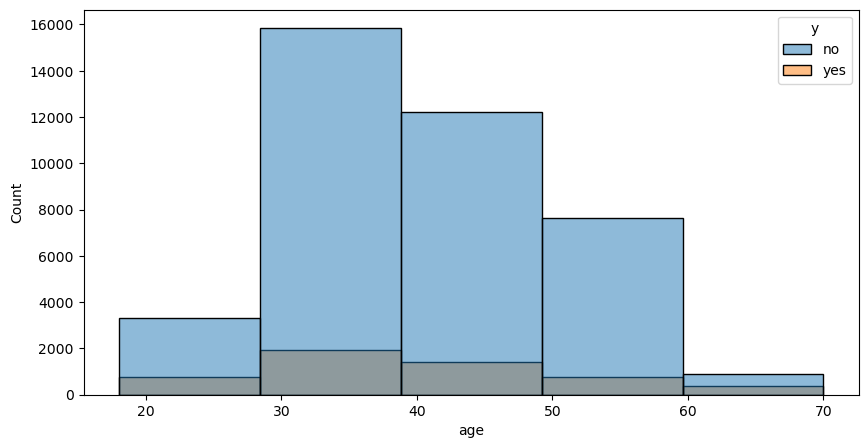

In [14]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "age",hue = "y",binwidth=10)

In [15]:
pd.crosstab((18<train_df["age"]) & (train_df["age"]<28),train_df["y"],normalize='index').iloc[1,]*100
# People having age between 18 and 28 is more likely to subscribe term deposit with conversion rate of 20%

y
no     80.645161
yes    19.354839
Name: True, dtype: float64

In [16]:
pd.crosstab(train_df["age"]>60,train_df["y"],normalize='index').iloc[1,]*100

# Most likelyhood of subscribing to term-deposit comes from people of age greater than 60 with conversion rate of 40%

y
no     59.486448
yes    40.513552
Name: True, dtype: float64

<Axes: xlabel='balance', ylabel='Count'>

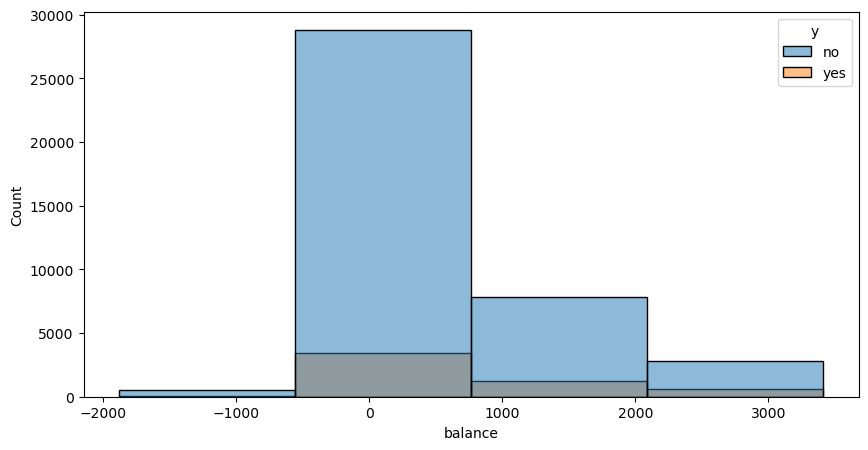

In [17]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "balance",hue = "y",binwidth=1500)

In [18]:
pd.crosstab((2100<train_df["balance"]),train_df["y"],normalize='index').iloc[1,]*100

# People having yearly average balance greater than 2100 is more likely to subscribe term deposit with conversion rate of 17%

y
no     82.865672
yes    17.134328
Name: True, dtype: float64

<Axes: xlabel='duration', ylabel='Count'>

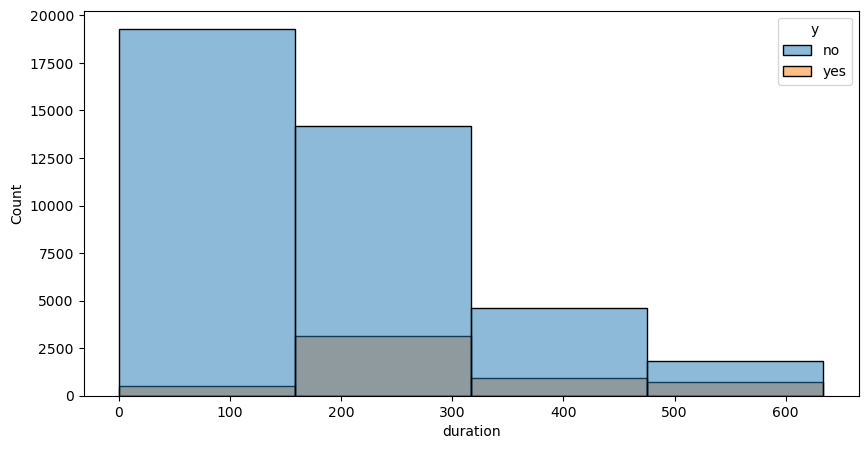

In [19]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "duration",hue = "y",binwidth=150)

In [20]:
pd.crosstab((490<train_df["duration"]),train_df["y"],normalize='index').iloc[1,]*100

# People having talk duration of more than 500 seconds are more likely to subcribe to term deposit with 30% conversion rate.

y
no     71.674208
yes    28.325792
Name: True, dtype: float64

<Axes: xlabel='campaign', ylabel='Count'>

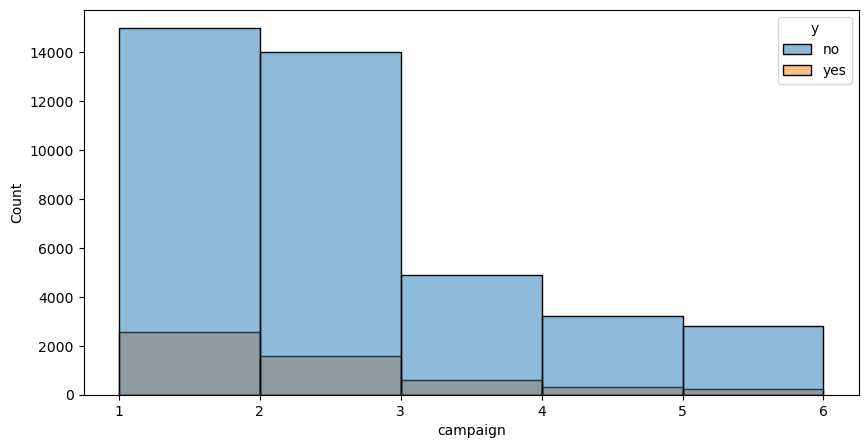

In [21]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "campaign",hue = "y",binwidth=1)

In [22]:
pd.crosstab((train_df["campaign"]<=1),train_df["y"],normalize='index').iloc[1,]*100

# People contacted only once during this campaign are more likely to subcribe to term deposit with 15% conversion rate.

y
no     85.402417
yes    14.597583
Name: True, dtype: float64

<Axes: xlabel='pdays', ylabel='Count'>

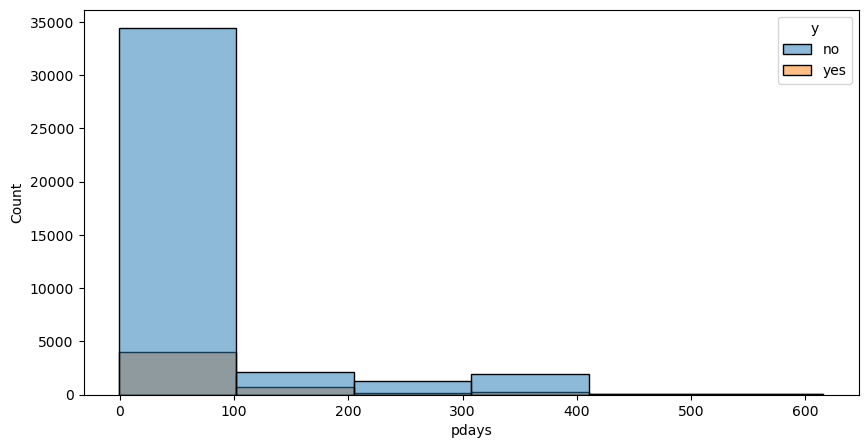

In [23]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "pdays",hue = "y",binwidth=100)

In [24]:
pd.crosstab((train_df["pdays"]>=100) & (train_df["pdays"]<=200),train_df["y"],normalize='index').iloc[1,]*100

# Gap of 100 to 200 days between previous and current campaign for the people are more likely to subcribe to term deposit with 25% conversion rate.

y
no     73.929558
yes    26.070442
Name: True, dtype: float64

<Axes: xlabel='previous', ylabel='Count'>

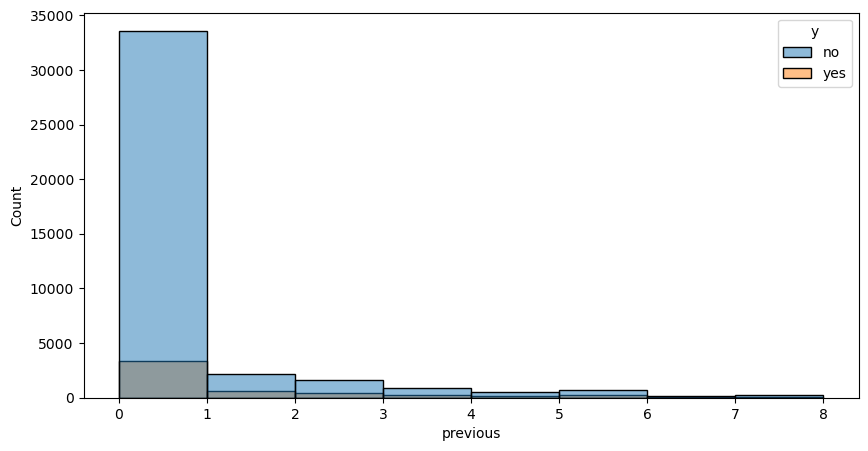

In [25]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "previous",hue = "y",binwidth=1)

In [26]:
pd.crosstab((train_df["previous"]>=3) & (train_df["previous"]<=4),train_df["y"],normalize='index').iloc[1,]*100

# contacting people 2 to 3 times before this campaign are more likely to subcribe to term deposit with 25% conversion rate.

y
no     74.946121
yes    25.053879
Name: True, dtype: float64

# Categorical Analysis

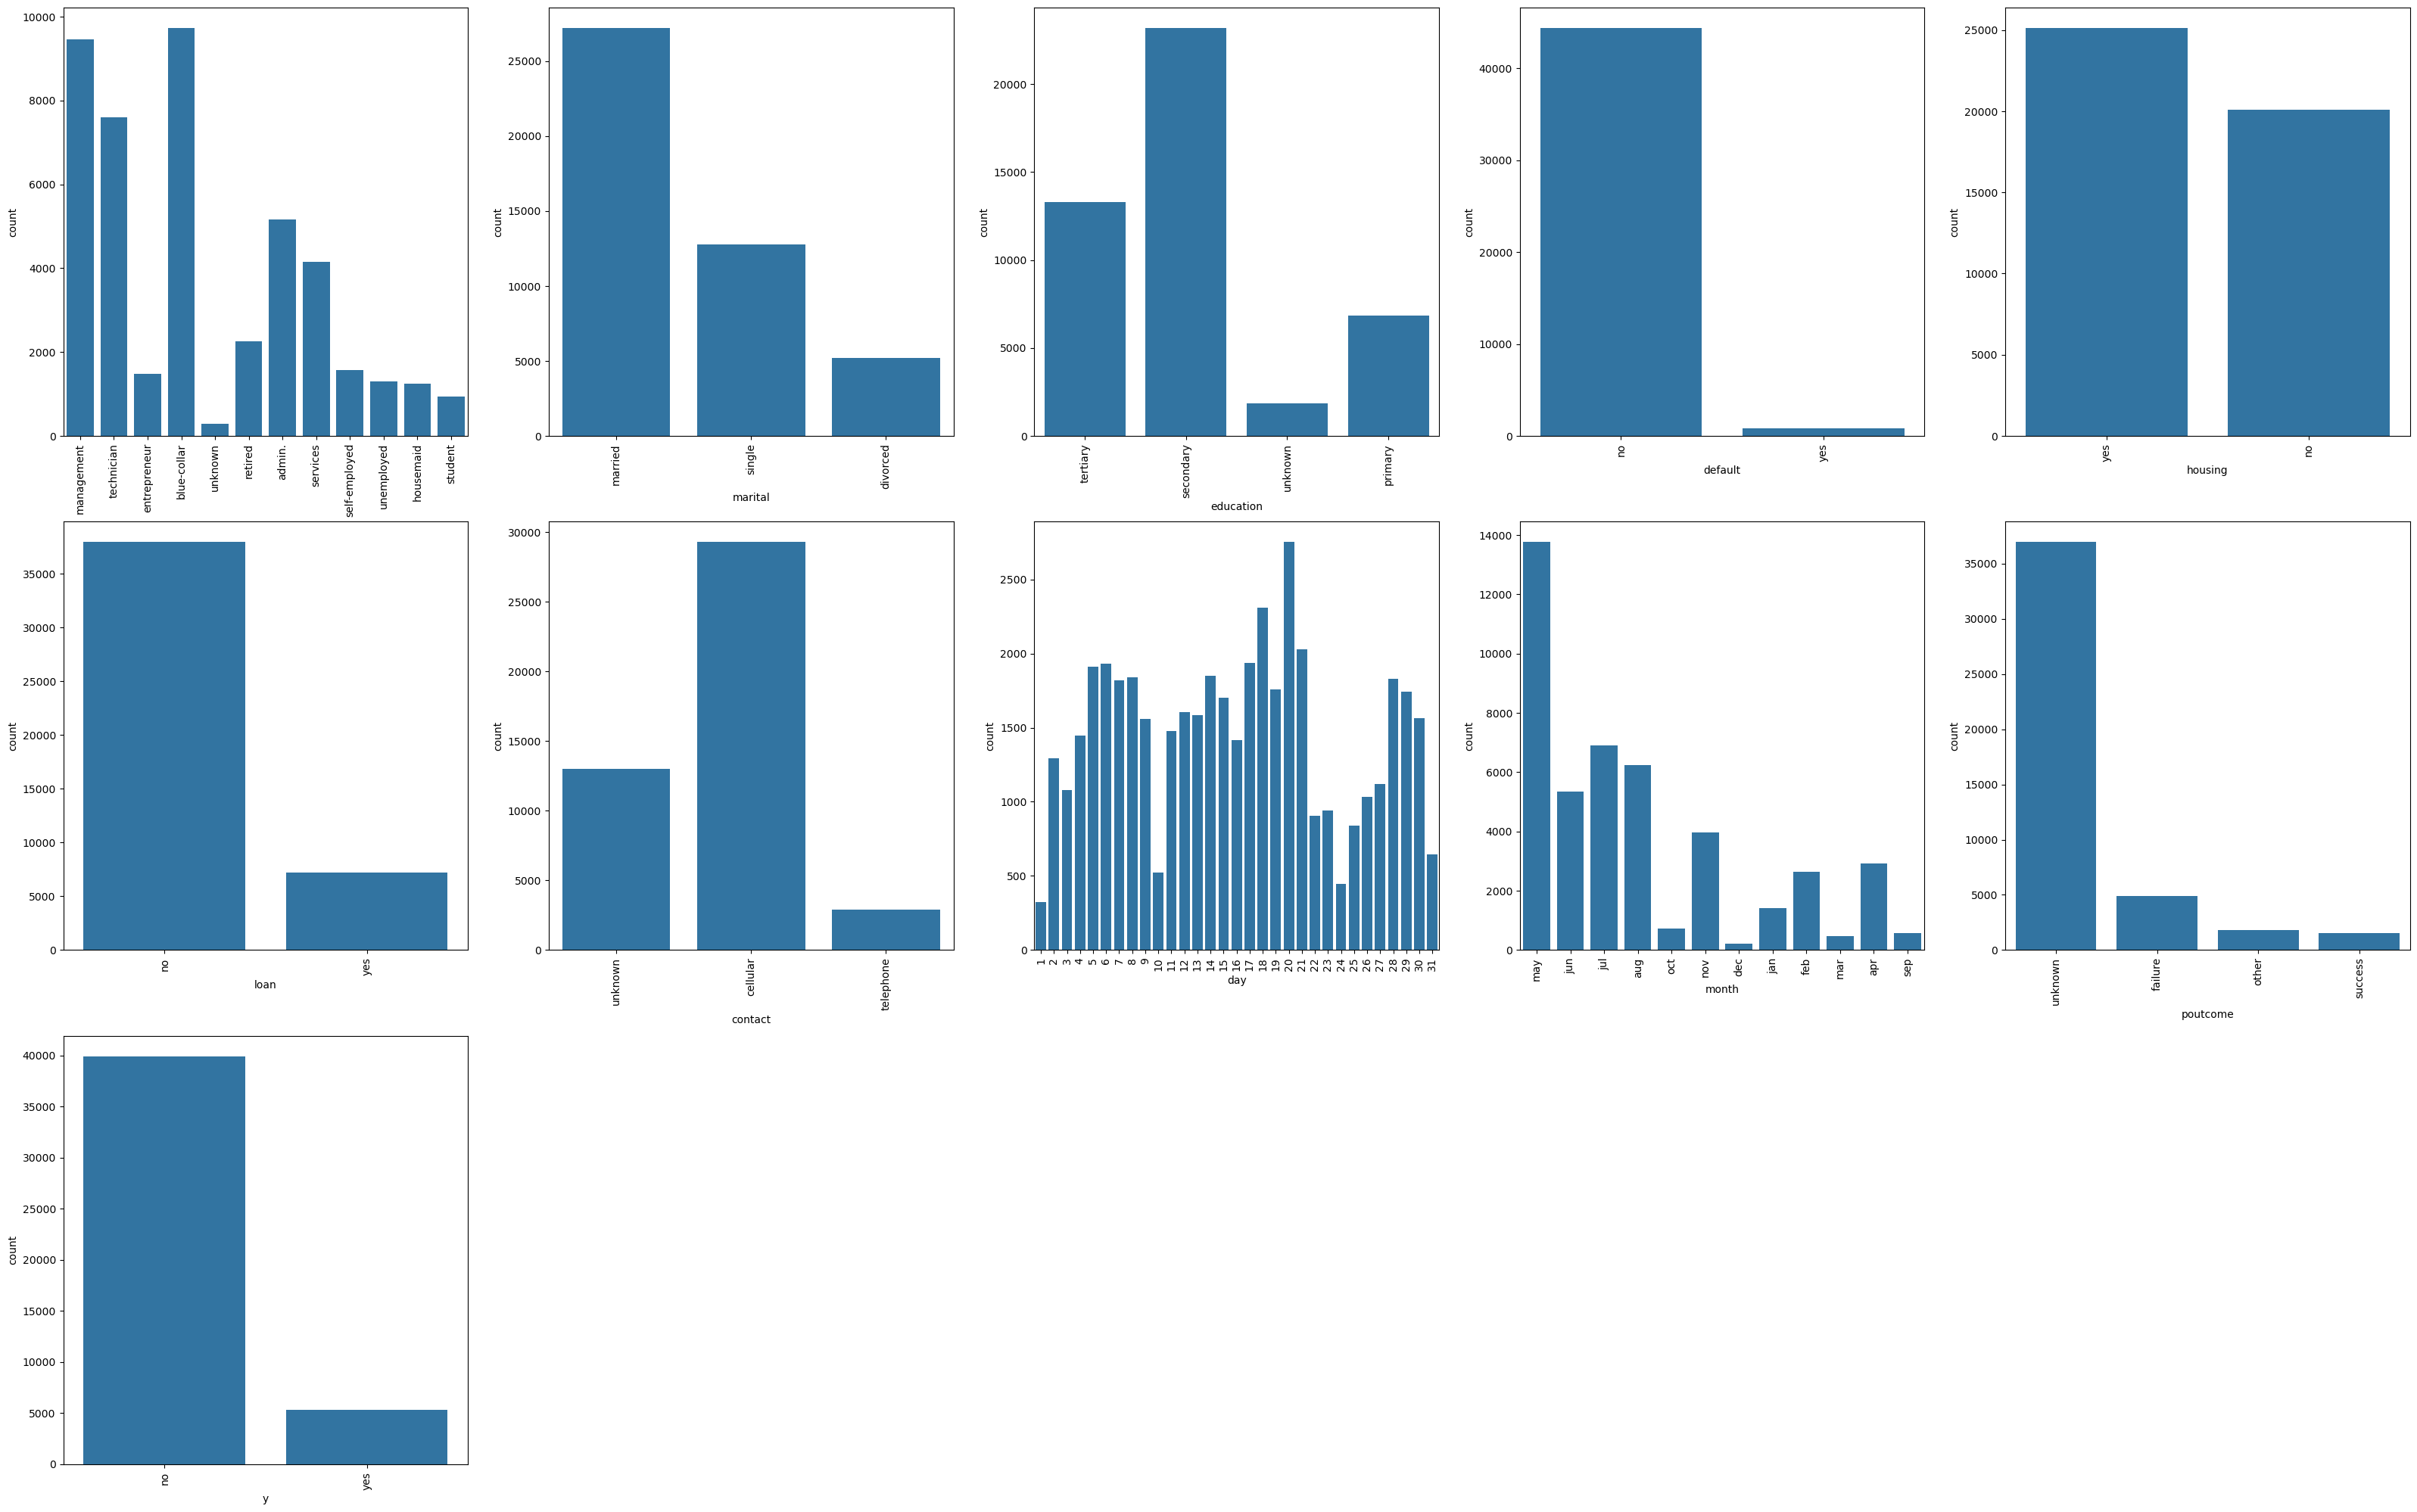

In [27]:
plt.figure(figsize=(40,25))

data = train_df[categorical_columns]

for idx,col in enumerate(categorical_columns):
    plt.subplot(3,5,idx+1) 
    sns.countplot(data = data ,x=col)
    plt.xticks(rotation = 90)

#### `From above we can get to know that data is imbalanced and insights dran from such data will be a biased insight`

## Balancing the data

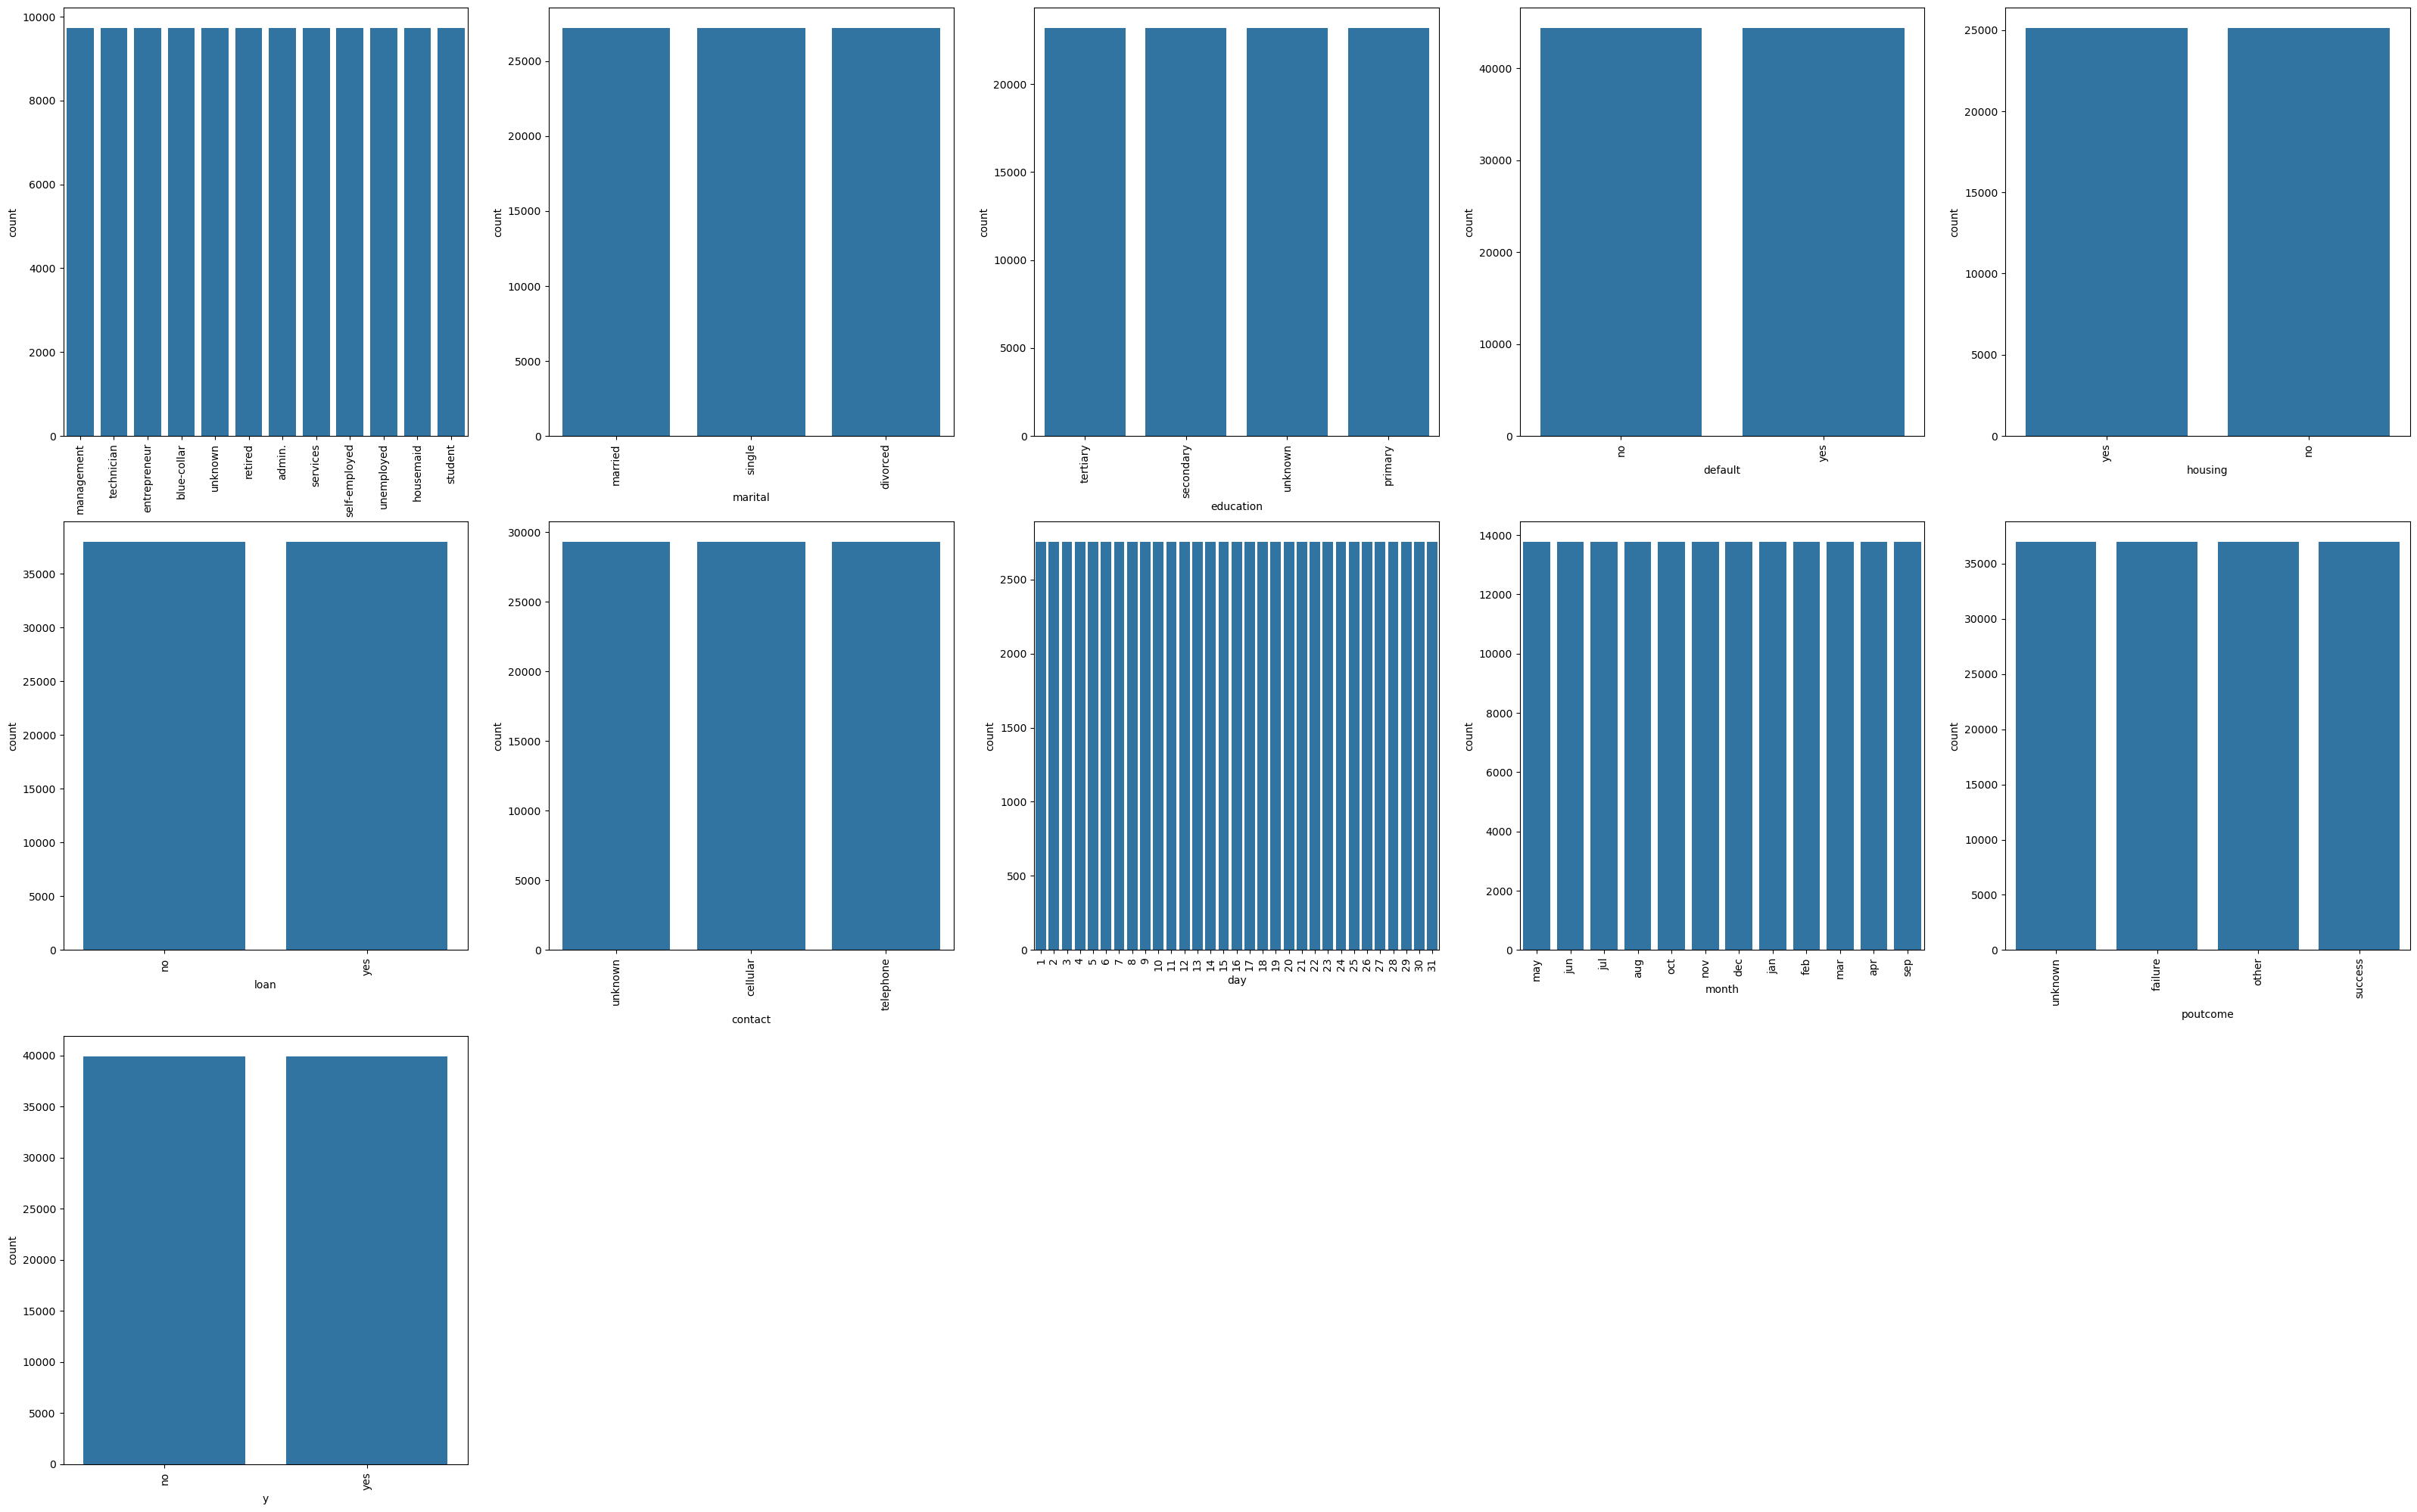

In [28]:
plt.figure(figsize=(40,25))
idx = 1

for col in categorical_columns:

    labels = train_df[col].unique()
    labels_frequency_data = train_df[col].value_counts()
    most_frequent_label = labels_frequency_data.index[0]
    highest_label_frequency = labels_frequency_data.values[0]
  
    temp_balanced_data = train_df.copy()

    for label in labels:
        if label!=most_frequent_label:
       
            specific_label_data = train_df[train_df[col]==label]
            label_frequency = specific_label_data.shape[0]
            sample_count = highest_label_frequency - label_frequency
            sampled_data = specific_label_data.sample(sample_count,replace=True)
            temp_balanced_data = pd.concat([temp_balanced_data,sampled_data])
          
    plt.subplot(3,5,idx) 
    sns.countplot(data = temp_balanced_data,x=col)
    plt.xticks(rotation = 90)

    idx+=1
            

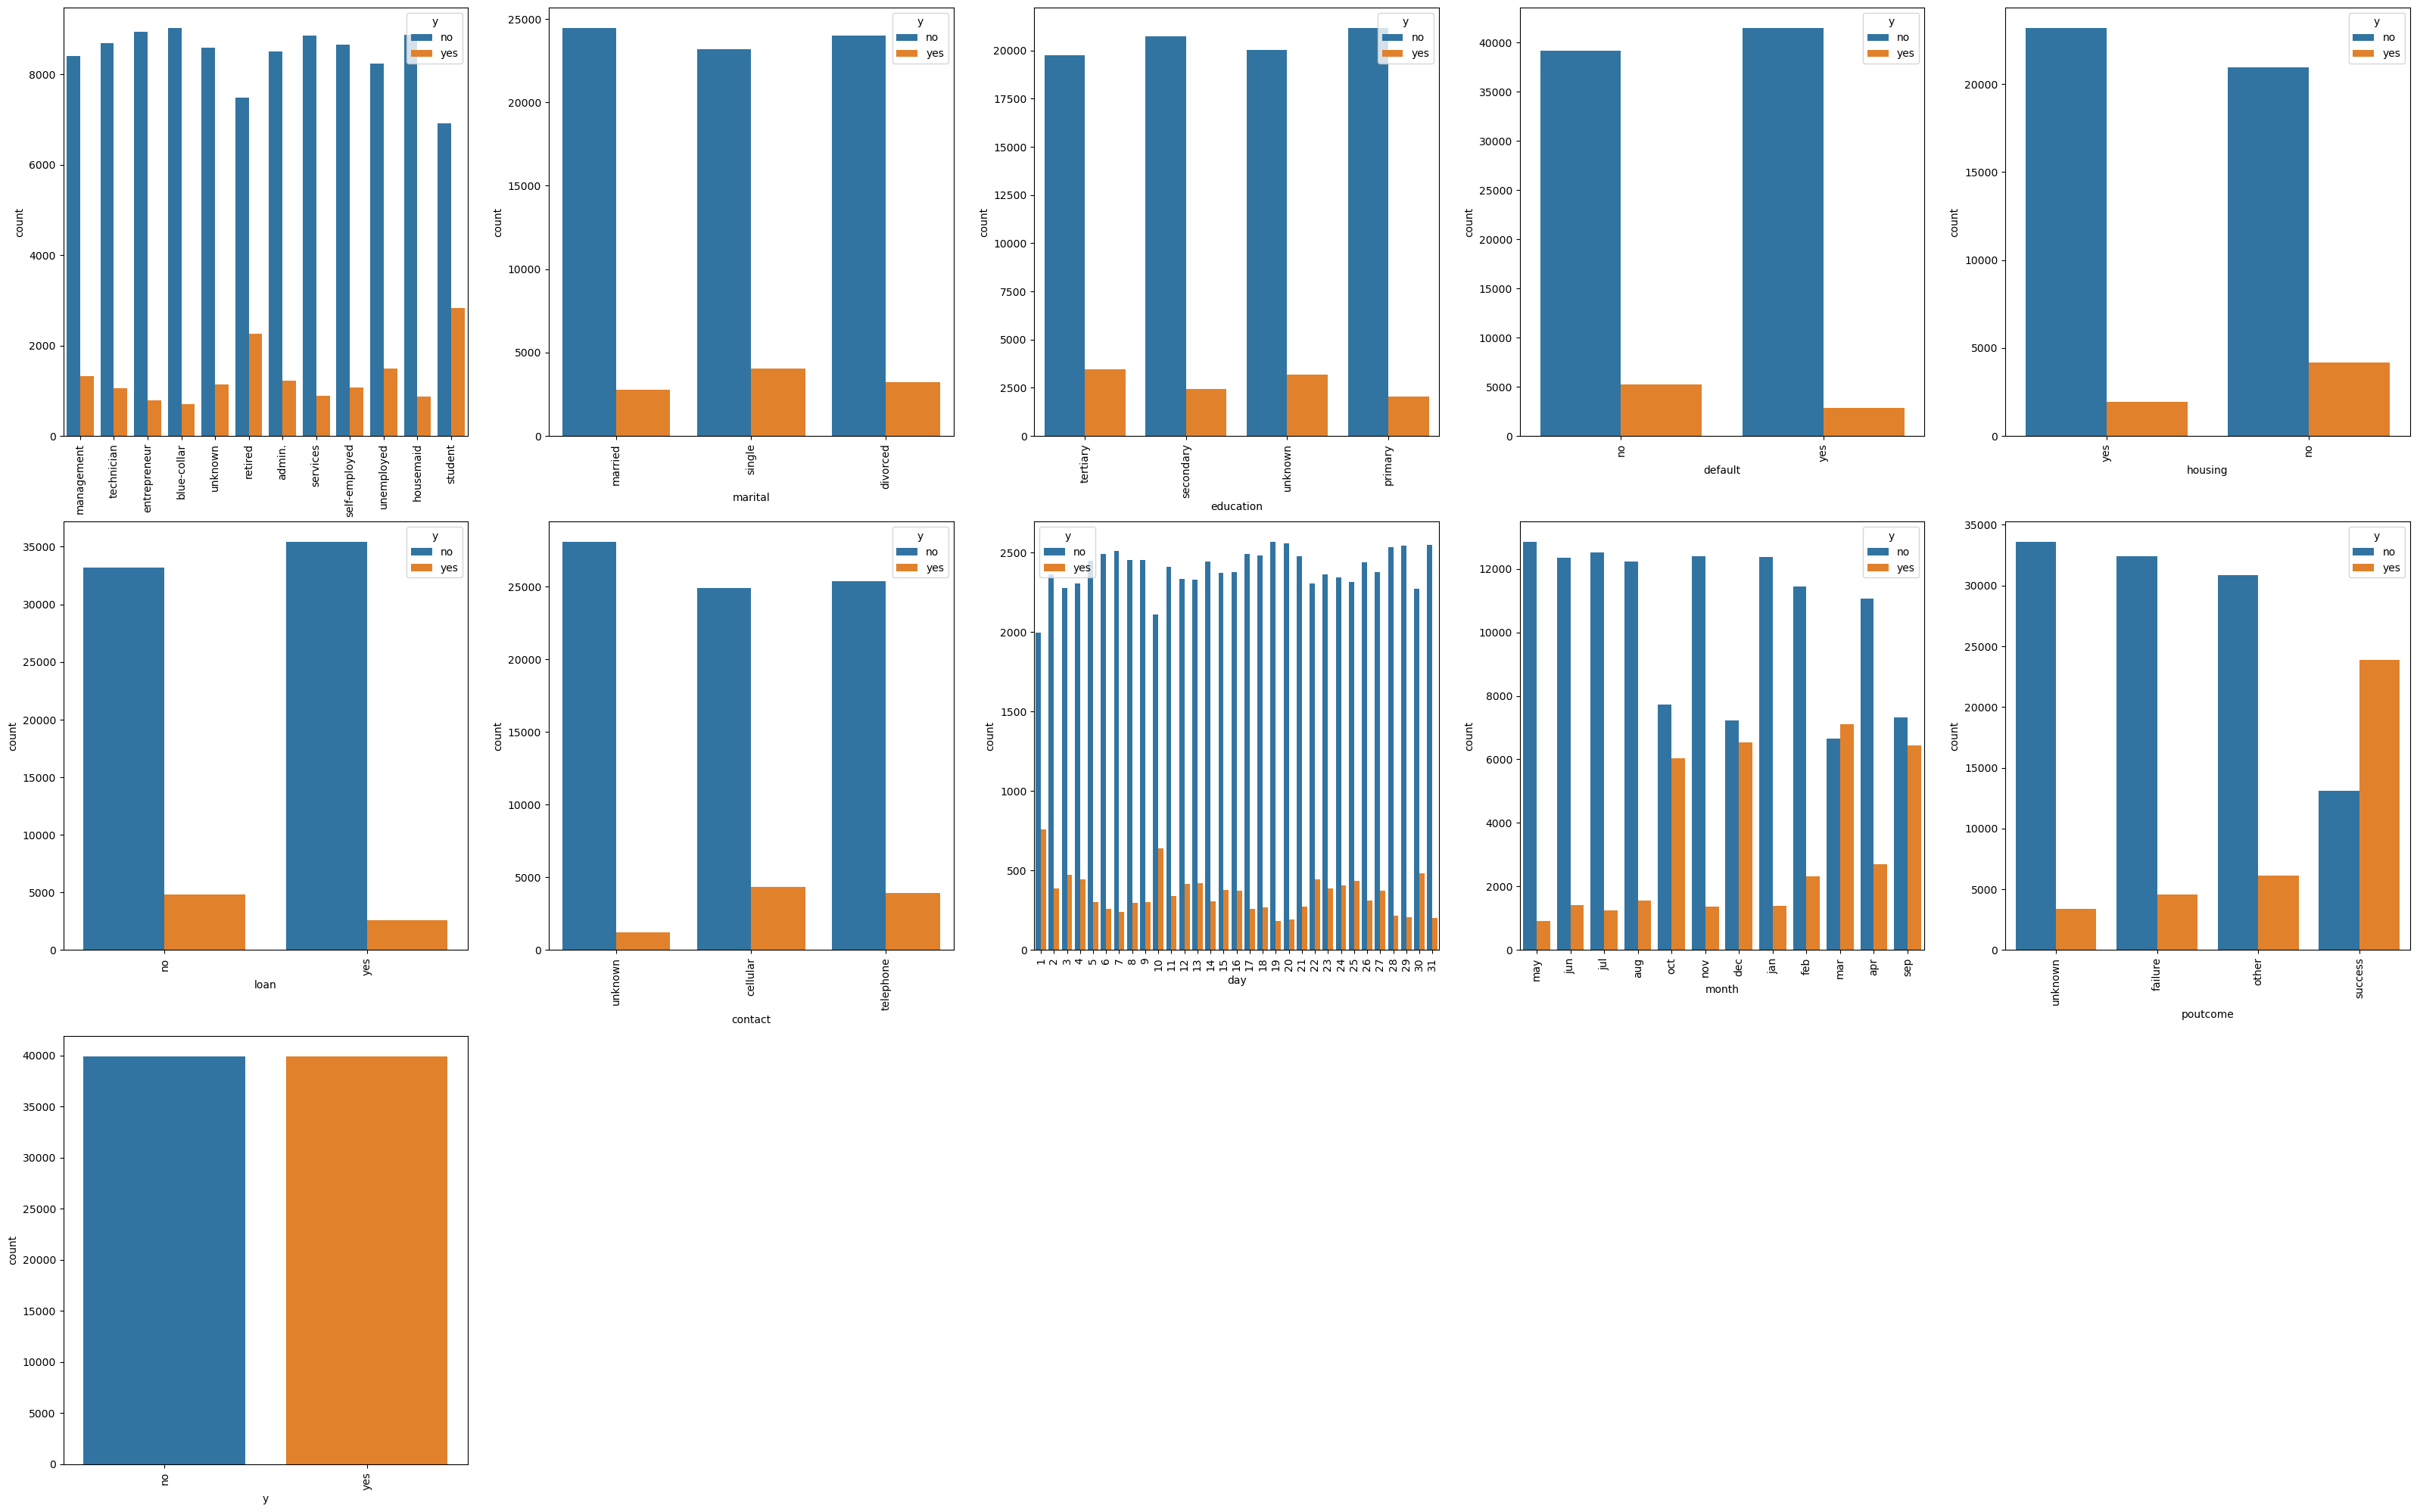

In [29]:
plt.figure(figsize=(40,25))
idx = 1

for col in categorical_columns:

    labels = train_df[col].unique()
    labels_frequency_data = train_df[col].value_counts()
    most_frequent_label = labels_frequency_data.index[0]
    highest_label_frequency = labels_frequency_data.values[0]
  
    temp_balanced_data = train_df.copy()

    for label in labels:
        if label!=most_frequent_label:
       
            specific_label_data = train_df[train_df[col]==label]
            label_frequency = specific_label_data.shape[0]
            sample_count = highest_label_frequency - label_frequency
            sampled_data = specific_label_data.sample(sample_count,replace=True)
            temp_balanced_data = pd.concat([temp_balanced_data,sampled_data])
          
    plt.subplot(3,5,idx) 
    sns.countplot(data = temp_balanced_data,x=col,hue = "y")
    plt.xticks(rotation = 90)

    idx+=1
            


In [30]:
pd.crosstab(train_df["job"],train_df["y"],normalize="index")

# Student and retired job type are more likely to subcribe term deposit with converion rate of 30 and 25 respectively

y,no,yes
job,,
admin.,0.877973,0.122027
blue-collar,0.927250,0.072750
entrepreneur,0.917283,0.082717
housemaid,0.912097,0.087903
management,0.862444,0.137556
retired,0.772085,0.227915
self-employed,0.881571,0.118429
services,0.911170,0.088830
student,0.713220,0.286780


In [31]:
pd.crosstab(train_df["marital"],train_df["y"],normalize="index")

# people with single marital status are more likely to buy subscription with conversion rate of 15%

y,no,yes
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


In [32]:
pd.crosstab(train_df["education"],train_df["y"],normalize="index")

# people with tertiary education are more likely to buy subscription with conversion rate of 15%

y,no,yes
education,,
primary,0.913735,0.086265
secondary,0.894406,0.105594
tertiary,0.849936,0.150064
unknown,0.864297,0.135703


In [33]:
pd.crosstab(train_df["default"],train_df["y"],normalize="index")

# people with no default credit are more likely to buy subscription with conversion rate of 10%

y,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


In [34]:
pd.crosstab(train_df["housing"],train_df["y"],normalize="index")

# people with no housing loan are more likely to buy subscription with conversion rate of 15%

y,no,yes
housing,,
no,0.832976,0.167024
yes,0.923000,0.077000


In [35]:
pd.crosstab(train_df["loan"],train_df["y"],normalize="index")

# people with no peronal loan are more likely to buy subscription with conversion rate of 15%

y,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


In [36]:
pd.crosstab(train_df["contact"],train_df["y"],normalize="index")

# people communicated vis cellular phone are more  likely to buy subscription with conversion rate of 15%

y,no,yes
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


In [37]:
pd.crosstab(train_df["day"],train_df["y"],normalize="index")

# people last contacted on day 1 of the month are more likely to buy subscription with conversion rate of 30%

y,no,yes
day,,
1,0.720497,0.279503
2,0.859242,0.140758
3,0.835032,0.164968
4,0.840830,0.159170
5,0.887435,0.112565
6,0.906315,0.093685
7,0.913594,0.086406
8,0.890879,0.109121
9,0.885330,0.114670


In [38]:
pd.crosstab(train_df["month"],train_df["y"],normalize="index")

# people last contacted in march are more likely to buy subscription with conversion rate of 50%.

y,no,yes
month,,
apr,0.803206,0.196794
aug,0.889867,0.110133
dec,0.532710,0.467290
feb,0.833522,0.166478
jan,0.898788,0.101212
jul,0.909065,0.090935
jun,0.897772,0.102228
mar,0.480084,0.519916
may,0.932805,0.067195


In [39]:
pd.crosstab(train_df["poutcome"],train_df["y"],normalize="index")

# people with success outcome from previous marketing campaign are more likely to buy subscription with conversion rate of 65%.

y,no,yes
poutcome,,
failure,0.873903,0.126097
other,0.833152,0.166848
success,0.352747,0.647253
unknown,0.908385,0.091615


In [40]:

!pip install xgboost catboost lightgbm


from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier  
from catboost import CatBoostClassifier  
from lightgbm import LGBMClassifier  

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Defaulting to user installation because normal site-packages is not writeable


In [41]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [42]:
marital_label_encoder = LabelEncoder()
default_label_encoder = LabelEncoder()
housing_label_encoder = LabelEncoder()
loan_label_encoder = LabelEncoder()
day_label_encoder = LabelEncoder()
month_label_encoder = LabelEncoder()
y_label_encoder = LabelEncoder()

train_df['marital'] = marital_label_encoder.fit_transform(train_df['marital'])
train_df['default'] = default_label_encoder.fit_transform(train_df['default'])
train_df['housing'] = housing_label_encoder.fit_transform(train_df['housing'])
train_df['loan'] = loan_label_encoder.fit_transform(train_df['loan'])
train_df['day'] = day_label_encoder.fit_transform(train_df['day'])
train_df['month'] = month_label_encoder.fit_transform(train_df['month'])
train_df['y'] = y_label_encoder.fit_transform(train_df['y'])

In [43]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,0,2143,1,0,unknown,4,8,261,1,-1,0,unknown,0
1,44,technician,2,secondary,0,29,1,0,unknown,4,8,151,1,-1,0,unknown,0
2,33,entrepreneur,1,secondary,0,2,1,1,unknown,4,8,76,1,-1,0,unknown,0
3,47,blue-collar,1,unknown,0,1506,1,0,unknown,4,8,92,1,-1,0,unknown,0
4,33,unknown,2,unknown,0,1,0,0,unknown,4,8,198,1,-1,0,unknown,0


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  int32 
 3   education  45211 non-null  object
 4   default    45211 non-null  int32 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int32 
 7   loan       45211 non-null  int32 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int32 
 10  month      45211 non-null  int32 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(7), int64(6), object(4)
memory usage: 4.7+ MB


In [45]:
numerical_columns = train_df.select_dtypes(include='int64').columns
categorical_columns = train_df.select_dtypes(include='object').columns

In [46]:

nums_pipeline = Pipeline([
    ('st_scaler', StandardScaler()),
    ('minmaxscaler', MinMaxScaler())
])

cats_pipeline = Pipeline([
    ("O_Encoder", OrdinalEncoder())

])

full_pipeline = ColumnTransformer([
    ('nums', nums_pipeline, numerical_columns),
    ('cats', cats_pipeline, categorical_columns),
])

In [47]:
full_pipeline

ColumnTransformer(transformers=[('nums',
                                 Pipeline(steps=[('st_scaler',
                                                  StandardScaler()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                ('cats',
                                 Pipeline(steps=[('O_Encoder',
                                                  OrdinalEncoder())]),
                                 Index(['job', 'education', 'contact', 'poutcome'], dtype='object'))])

In [48]:
x = train_df.drop('y',axis=1)
y = train_df['y']

In [49]:
x = full_pipeline.fit_transform(x)
x

array([[0.76923077, 0.76024165, 0.41167192, ..., 2.        , 2.        ,
        3.        ],
       [0.5       , 0.36114782, 0.23817035, ..., 1.        , 2.        ,
        3.        ],
       [0.28846154, 0.35605059, 0.11987382, ..., 1.        , 2.        ,
        3.        ],
       ...,
       [0.42307692, 0.35510666, 0.42902208, ..., 1.        , 0.        ,
        2.        ],
       [0.75      , 0.48178214, 0.80126183, ..., 1.        , 1.        ,
        3.        ],
       [0.36538462, 0.91655654, 0.56940063, ..., 1.        , 0.        ,
        1.        ]])

In [50]:
#Logistic Regression
logreg_model = LogisticRegression()

#KNN classifier
KNN_model = KNeighborsClassifier()

#DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

#RandomForestClassifier
rf_model = RandomForestClassifier()

#Support Vector Machines (SVM)
svm_model = SVC()

#Naive Bayes:
GNB_model = GaussianNB()

#Gradient Boosting
GB_model = GradientBoostingClassifier()

#Neural Networks (Deep Learning)
dl_model = MLPClassifier()

# XG Boost
XGB_model = XGBClassifier()

# CatBoost
CB_model = CatBoostClassifier()

# lightgbm
LGBM_model = LGBMClassifier()


In [51]:
logreg_model.fit(x,y)
KNN_model.fit(x,y)
dt_model.fit(x,y)
rf_model.fit(x,y)
svm_model.fit(x,y)
GNB_model.fit(x,y)
GB_model.fit(x,y)
dl_model.fit(x,y)
XGB_model.fit(x,y)
CB_model.fit(x,y)
LGBM_model.fit(x,y)

Learning rate set to 0.052447
0:	learn: 0.6314385	total: 190ms	remaining: 3m 10s
1:	learn: 0.5789908	total: 201ms	remaining: 1m 40s
2:	learn: 0.5354260	total: 213ms	remaining: 1m 10s
3:	learn: 0.4967659	total: 224ms	remaining: 55.9s
4:	learn: 0.4659905	total: 239ms	remaining: 47.6s
5:	learn: 0.4400689	total: 253ms	remaining: 41.9s
6:	learn: 0.4176138	total: 269ms	remaining: 38.2s
7:	learn: 0.3979334	total: 283ms	remaining: 35s
8:	learn: 0.3813967	total: 298ms	remaining: 32.8s
9:	learn: 0.3679090	total: 312ms	remaining: 30.9s
10:	learn: 0.3530130	total: 326ms	remaining: 29.3s
11:	learn: 0.3419159	total: 338ms	remaining: 27.8s
12:	learn: 0.3325366	total: 354ms	remaining: 26.9s
13:	learn: 0.3237672	total: 365ms	remaining: 25.7s
14:	learn: 0.3157765	total: 377ms	remaining: 24.8s
15:	learn: 0.3090980	total: 389ms	remaining: 24s
16:	learn: 0.3025619	total: 401ms	remaining: 23.2s
17:	learn: 0.2974852	total: 414ms	remaining: 22.6s
18:	learn: 0.2933518	total: 427ms	remaining: 22.1s
19:	learn: 0

LGBMClassifier()

In [52]:
test_df =  pd.read_csv('test.csv')
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [53]:
test_df['marital'] = marital_label_encoder.transform(test_df['marital'])
test_df['default'] = default_label_encoder.transform(test_df['default'])
test_df['housing'] = housing_label_encoder.transform(test_df['housing'])
test_df['loan'] = loan_label_encoder.transform(test_df['loan'])
test_df['day'] = day_label_encoder.transform(test_df['day'])
test_df['month'] = month_label_encoder.transform(test_df['month'])
test_df['y'] = y_label_encoder.transform(test_df['y'])

In [54]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,0,1787,0,0,cellular,18,10,79,1,-1,0,unknown,0
1,33,services,1,secondary,0,4789,1,1,cellular,10,8,220,1,339,4,failure,0
2,35,management,2,tertiary,0,1350,1,0,cellular,15,0,185,1,330,1,failure,0
3,30,management,1,tertiary,0,1476,1,1,unknown,2,6,199,4,-1,0,unknown,0
4,59,blue-collar,1,secondary,0,0,1,0,unknown,4,8,226,1,-1,0,unknown,0


In [55]:
xtest = test_df.drop('y',axis = 1)
ytest = test_df['y']

In [56]:
xtest = full_pipeline.transform(xtest)
xtest

array([[0.23076923, 0.69303379, 0.12460568, ..., 0.        , 0.        ,
        3.        ],
       [0.28846154, 1.25976968, 0.34700315, ..., 1.        , 0.        ,
        0.        ],
       [0.32692308, 0.61053426, 0.29179811, ..., 2.        , 0.        ,
        0.        ],
       ...,
       [0.75      , 0.41136492, 0.23817035, ..., 1.        , 0.        ,
        3.        ],
       [0.19230769, 0.57032282, 0.20347003, ..., 1.        , 0.        ,
        1.        ],
       [0.5       , 0.57013404, 0.54416404, ..., 2.        , 0.        ,
        1.        ]])

In [57]:
df_pred = pd.DataFrame()

df_pred['Logistic Regression'] = logreg_model.predict(xtest)
df_pred['KNN classifier'] = KNN_model.predict(xtest)
df_pred['Decision Tree'] = dt_model.predict(xtest)
df_pred['Random Forest'] = rf_model.predict(xtest)
df_pred['SVM'] = svm_model.predict(xtest)
df_pred['Naive Bayes'] = GNB_model.predict(xtest)
df_pred['Gradient Boosting'] = GB_model.predict(xtest)
df_pred['Deep Learning'] = dl_model.predict(xtest)
df_pred['XGBoost'] = XGB_model.predict(xtest)
df_pred['CBBoost'] = CB_model.predict(xtest)
df_pred['LGBMBoost'] = LGBM_model.predict(xtest)

In [58]:
df_pred.head()

,Logistic Regression,KNN classifier,Decision Tree,Random Forest,SVM,Naive Bayes,Gradient Boosting,Deep Learning,XGBoost,CBBoost,LGBMBoost
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


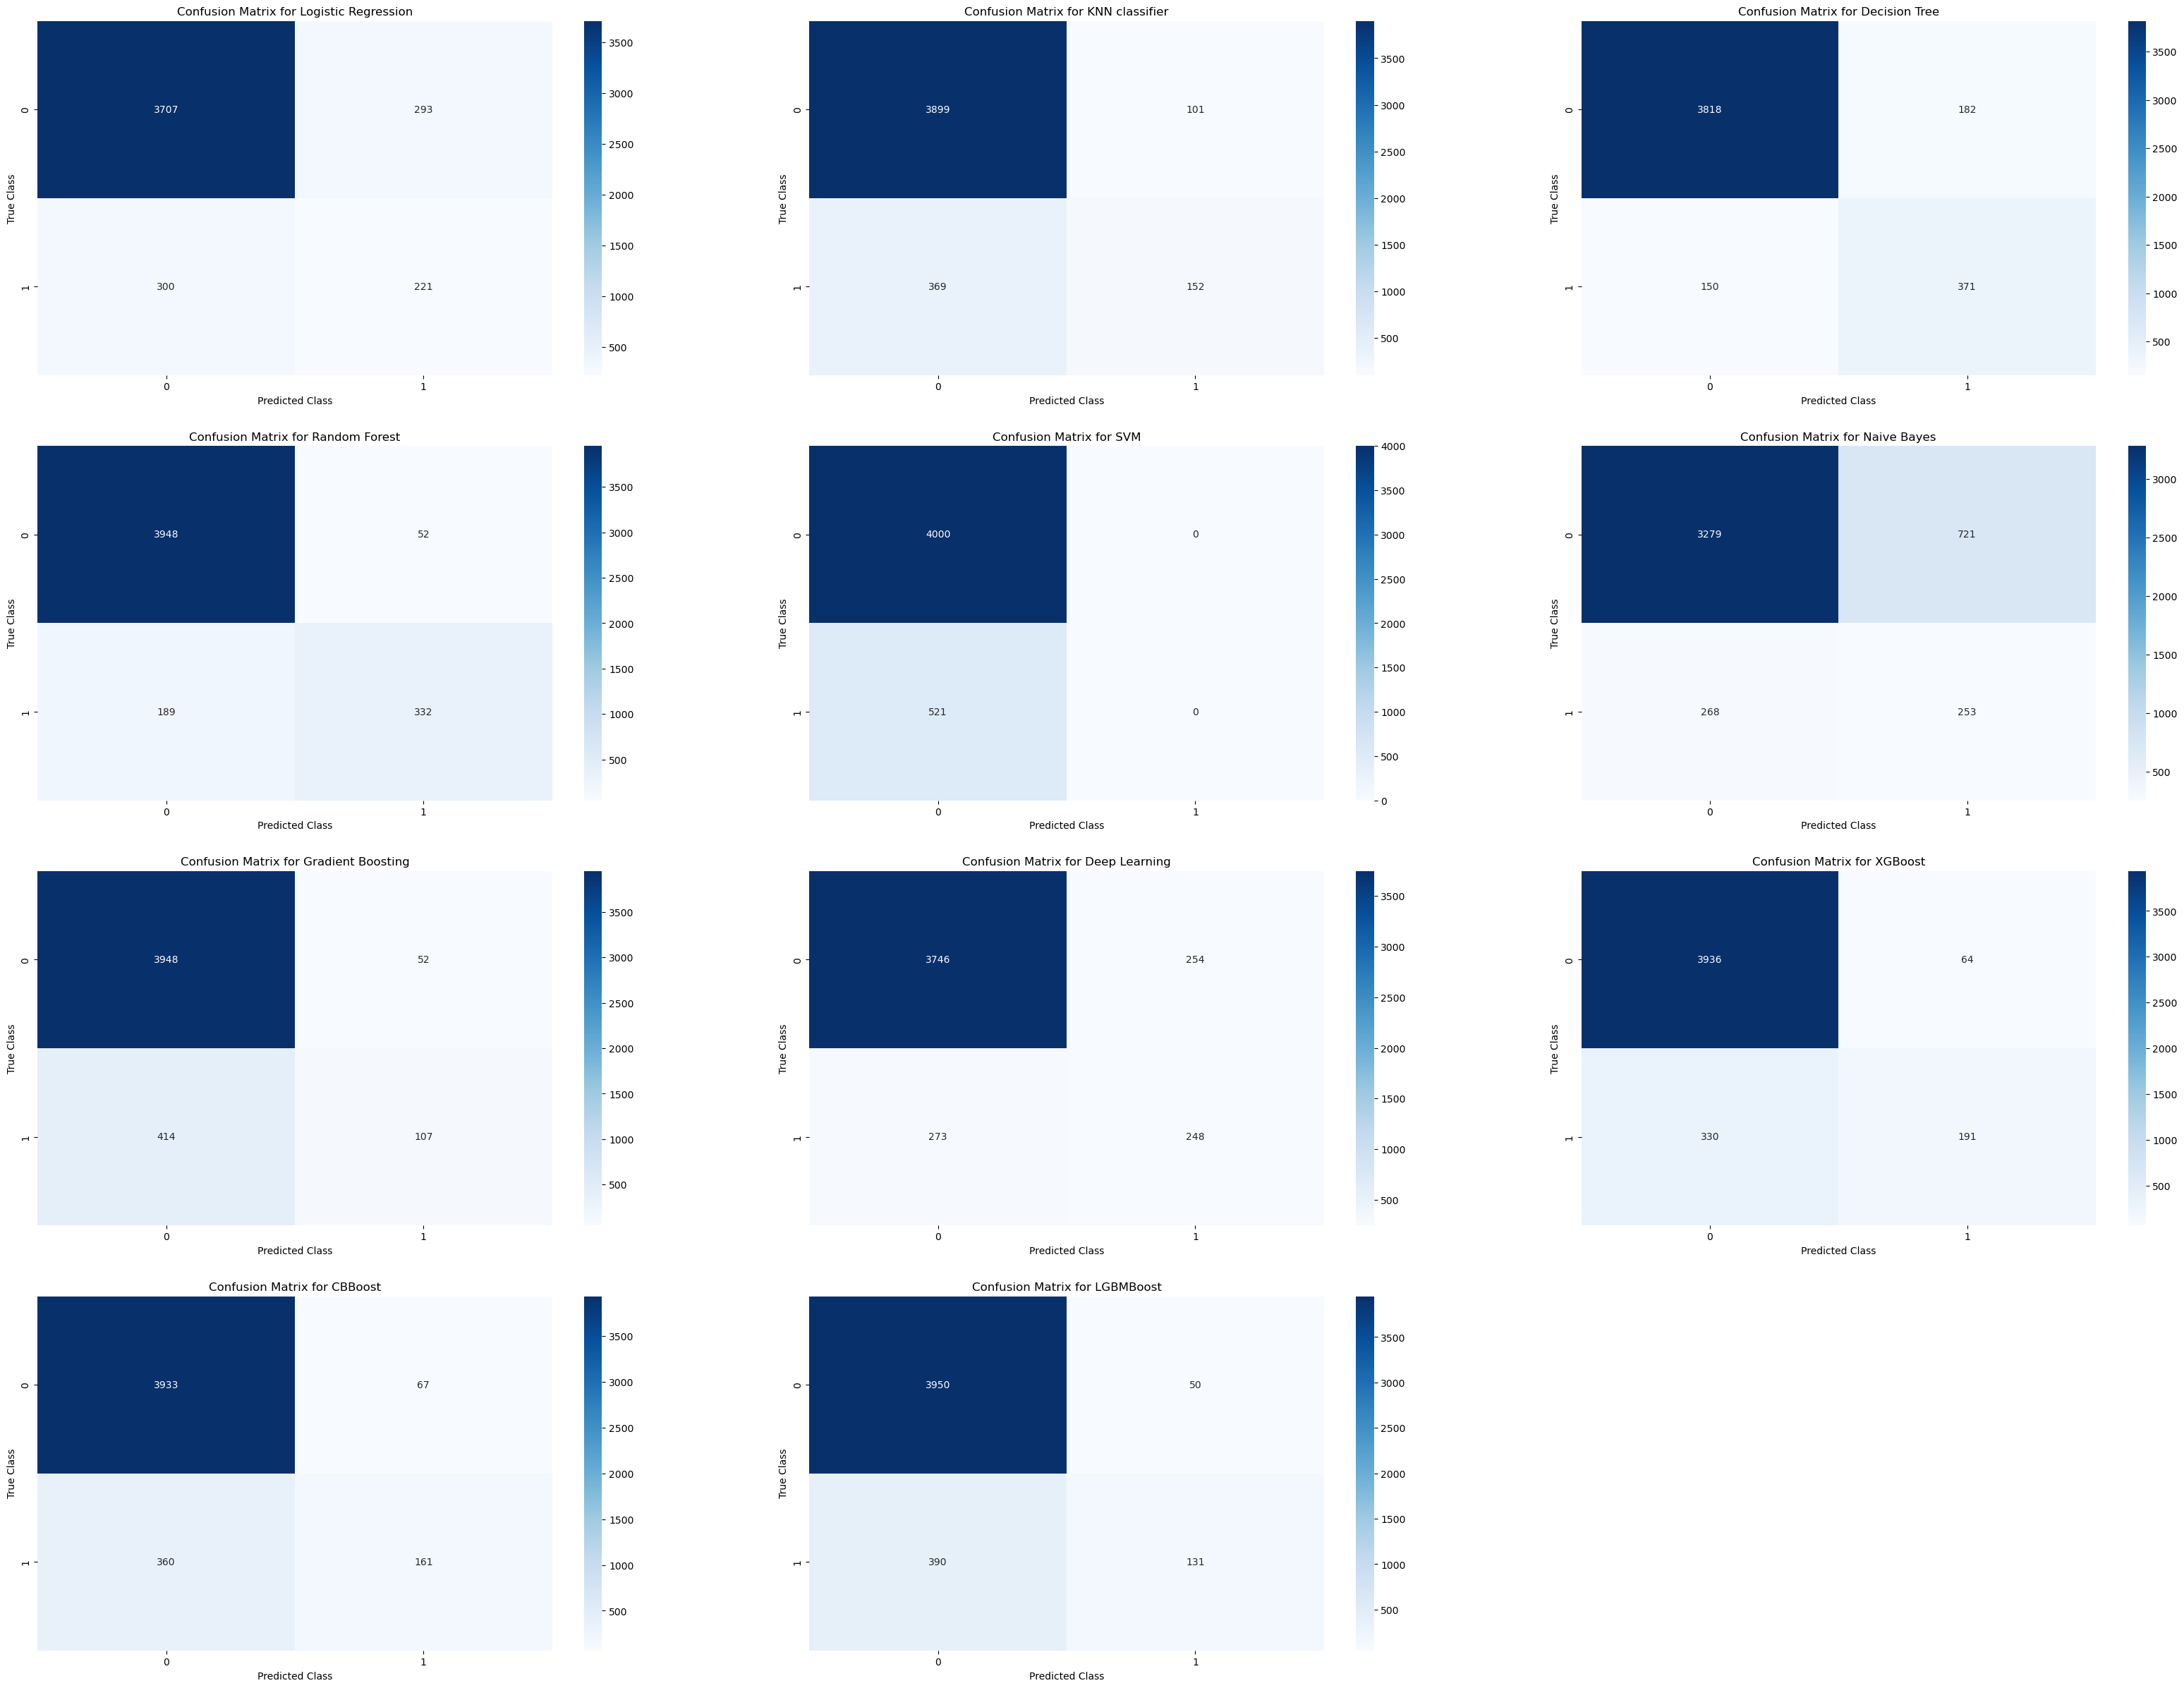

In [59]:
plt.figure(figsize=(40,30))

for idx,model in enumerate(df_pred.columns):
    plt.subplot(4,3,idx+1)
    sns.heatmap(confusion_matrix(ytest, df_pred[model]), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(f'Confusion Matrix for {model}')

In [60]:
model_parameters = {

    'LogisticRegression':{

        'model': LogisticRegression(),

        'params':{
            'solver': ['newton-cg', 'lbfgs', 'liblinear'],
            'penalty' : ['l2'],
            'C' : [100, 10, 1.0, 0.1, 0.01]
        }
    },


    'KNeighborsClassifier':{

        'model': KNeighborsClassifier(),

        'params': {
            'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
        }
    },


    'SVC':{

        'model': SVC(),

        'params':{
            'C': [0.1, 1, 10, 100, 1000],  
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
            'kernel': ['rbf']
        }
    },

    'GaussianNB':{

        'model': GaussianNB(),

        'params':{
            'var_smoothing': np.logspace(0,-9, num=100)
        }
    },

    'DecisionTreeClassifier':{

        'model': DecisionTreeClassifier(),

        'params':{
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]
        }
    },

    'RandomForestClassifier':{

        'model':RandomForestClassifier(),

        'params':{
                'n_estimators':[10,50,100,130],
                'criterion':['gini','entropy'],
                'max_depth':range(2,4,1),
                'max_features':['auto','log2']
        }
    },

    'MLPClassifier':{

        'model': MLPClassifier(),
        
        'params':{
                'hidden_layer_sizes': [(10,30,10),(20,)],
                'activation': ['tanh', 'relu'],
                'solver': ['sgd', 'adam'],
                'alpha': [0.0001, 0.05],
                'learning_rate': ['constant','adaptive'],
        }

    },

    'GradientBoostingClassifier':{

        'model': GradientBoostingClassifier(),

        'params': {
            'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
            'min_samples_split':range(400,1200,100), 
            'min_samples_leaf':range(30,71,10),
            'max_features':range(7,20,2)
        }

    },

    'XGBClassifier':{

        'model':XGBClassifier(objective='binary:logistic'),

        'params':{
                'learning_rate':[0.5,0.1,0.1,0.01],
                'max_depth':[3,5,10,20],
                'n_estimators':[10,50,100,200]
        }
    },

    'CatBoostClassifier':{

            'model': CatBoostClassifier(),

            'params':{ 
                "learning_rate": np.linspace(0,0.2,5),
                'max_depth': [3,4,5],
                'n_estimators':[100, 200, 300]
            }         
    },

    'LGBMClassifier' : {

            'model': LGBMClassifier(),
            
            'params':{
                    'metric': 'multi_logloss',
                    'boosting_type': 'gbdt',
                    'num_leaves': 31,
                    'learning_rate': 0.05,
            }       
    },     


}

In [ ]:
scores=[]
for model_name, mp in model_parameters.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['params'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_params':model_selection.best_params_
    })